Loading the dat
Cleaning the data
Visualising the data

Questions to be answered
1. distribution of apps across different categories. Top 10 and bottom 10 apps.

2. Share of apps besed on the categories 

3. Over all average ratings of the apps

4. Average ratings based on the  categories

5. Use jointplot to To check rating is  a function of size 

6. Use joint plot To check whether rating is a function of price

7. RElationship between app categoory and app price 
	
8. Relationship between size and installs of paid apps

9. Relatioship between size and installs of free apps






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [114]:
plt.style.use('seaborn-colorblind')

Loading the data

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'apps.csv',
 'Playstore Analysis.ipynb',
 'Untitled.ipynb',
 'user_reviews.csv']

In [5]:
apps_df = pd.read_csv('apps.csv')

In [7]:
user_reviews_df = pd.read_csv('user_reviews.csv')

In [8]:
apps_df.head(5)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Cleaning the data and performing transformation of data

In [15]:
apps_df = apps_df.drop(['Unnamed: 0'], axis=1)

In [16]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Removing the duplicates and outliers

In [17]:
apps_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9654    False
9655    False
9656    False
9657    False
9658    False
Length: 9659, dtype: bool

In [18]:
apps_df = apps_df.drop_duplicates()

In [19]:
user_reviews_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
64290     True
64291     True
64292     True
64293     True
64294     True
Length: 64295, dtype: bool

In [20]:
user_reviews_df = user_reviews_df.drop_duplicates()

In [21]:
user_reviews_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
64223    False
64226    False
64227    False
64230    False
64236    False
Length: 30679, dtype: bool

First we will be cleaning all the characters such as '+', '$', ',' from the columns installs and price

In [23]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: x.replace('+', ''))

In [26]:
apps_df['Price']  = apps_df['Price'].apply(lambda x: x.replace('$', ''))

In [34]:
apps_df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [31]:
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: x.replace(',', ''))

In [32]:
apps_df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [33]:
print(apps_df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Convert the datatypes of Installs to Int, Price to Float
Last updated to datetime

In [36]:
apps_df['Installs'] = apps_df['Installs'].astype('int')

In [37]:
apps_df['Price'] = apps_df['Price'].astype('float')

In [38]:
apps_df['Last updated'] =  pd.to_datetime(apps_df['Last Updated'])

In [39]:
print(apps_df.dtypes)

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated              object
Current Ver               object
Android Ver               object
Last updated      datetime64[ns]
dtype: object


In [40]:
apps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,20.395327,7.777507e+06,1.099299
std,0.536625,1.831320e+06,21.827509,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


Removing Outliers from apps_df, as it will hamper our analysis.

In [69]:
from scipy.stats import iqr

In [70]:
iqr = iqr(apps_df['Installs'])

In [72]:
iqr

999000.0

In [73]:
lowerthreshold = np.quantile(apps_df['Installs'], 0.25)

In [74]:
upperthreshold = np.quantile(apps_df['Installs'], 0.75)

In [77]:
# lowerthreshold
upperthreshold

1000000.0

In [78]:
apps_df[(apps_df['Installs'] < lowerthreshold) | (apps_df['Installs'] > upperthreshold)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20.0,10000000,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,2018-04-02
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39.0,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,2018-08-03
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31.0,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,2018-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,2018-03-23
9652,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,2017-06-18
9653,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,2016-09-29
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,2018-07-06


these all are the outliers... and we will remove them

In [79]:
apps_df = apps_df.drop(apps_df[(apps_df['Installs'] < lowerthreshold) | (apps_df['Installs'] > upperthreshold)].index)

In [80]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9650,FR Tides,WEATHER,3.8,1195,0.6,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6,2.1 and up,2014-02-16
9651,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,2014-03-23
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,2017-07-25
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up,2017-01-20


Now removing the NaN values

In [83]:
apps_df.isna().sum(axis=0)

App                 0
Category            0
Rating            311
Reviews             0
Size              515
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         6
Android Ver         2
Last updated        0
dtype: int64

As in the dataset apps_df, there are not so much NaN values, we can bear with it.

Now cleaning the user_reviews dataset

In [86]:
user_reviews_df

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [87]:
user_reviews_df.isna().sum(axis=0)

App                         0
Review                    987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [89]:
user_reviews_df = user_reviews_df.dropna(how='any')

In [90]:
user_reviews_df

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [96]:
user_reviews_df.dtypes

App                        object
Review                     object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

Removing outliers from user_reviews_df

In [98]:
from scipy.stats import iqr
iqr = iqr(user_reviews_df['Sentiment_Polarity'])

In [99]:
iqr

0.4229166666666666

In [100]:
lowerthreshold = np.quantile(user_reviews_df['Sentiment_Polarity'], 0.25)

In [101]:
upperthreshold = np.quantile(user_reviews_df['Sentiment_Polarity'], 0.75)

In [102]:
lowerthreshold

0.0

In [103]:
upperthreshold

0.4229166666666666

In [104]:
user_reviews_df[(user_reviews_df['Sentiment_Polarity'] < lowerthreshold) | (user_reviews_df['Sentiment_Polarity'] > upperthreshold)]

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
...,...,...,...,...,...
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


These all are the outliers and we will remove them

In [105]:
user_reviews_df = user_reviews_df.drop(user_reviews_df[(user_reviews_df['Sentiment_Polarity'] < lowerthreshold) | (user_reviews_df['Sentiment_Polarity'] > upperthreshold)].index)

In [106]:
user_reviews_df

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64218,Housing-Real Estate & Property,What nonsensical app.. doesn't owner postings ...,Neutral,0.000000,0.000000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667


Now we will be starting our analysis

1. distribution of apps across different categories. Top 10 and bottom 10 apps.

In [107]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26


In [109]:
apps_df['Category'].value_counts().sort_values()

EVENTS                   38
BEAUTY                   44
COMICS                   49
ENTERTAINMENT            52
WEATHER                  53
ART_AND_DESIGN           54
PARENTING                56
HOUSE_AND_HOME           58
AUTO_AND_VEHICLES        62
FOOD_AND_DRINK           71
LIBRARIES_AND_DEMO       73
MAPS_AND_NAVIGATION      87
EDUCATION                91
VIDEO_PLAYERS            97
SHOPPING                100
DATING                  109
PHOTOGRAPHY             129
SOCIAL                  131
TRAVEL_AND_LOCAL        134
BOOKS_AND_REFERENCE     143
COMMUNICATION           145
NEWS_AND_MAGAZINES      168
HEALTH_AND_FITNESS      172
SPORTS                  179
PRODUCTIVITY            189
BUSINESS                195
PERSONALIZATION         208
LIFESTYLE               236
MEDICAL                 246
FINANCE                 258
GAME                    493
TOOLS                   510
FAMILY                 1260
Name: Category, dtype: int64

In [110]:
top10_categories = apps_df['Category'].value_counts().sort_values(ascending=False).head(10)

In [111]:
top10_categories

FAMILY             1260
TOOLS               510
GAME                493
FINANCE             258
MEDICAL             246
LIFESTYLE           236
PERSONALIZATION     208
BUSINESS            195
PRODUCTIVITY        189
SPORTS              179
Name: Category, dtype: int64

In [112]:
bottom10_categories = apps_df['Category'].value_counts().sort_values().head(10)

In [121]:
bottom10_categories = bottom10_categories.to_frame()

In [122]:
bottom10_categories

,Category
EVENTS,38
BEAUTY,44
COMICS,49
ENTERTAINMENT,52
WEATHER,53
ART_AND_DESIGN,54
PARENTING,56
HOUSE_AND_HOME,58
AUTO_AND_VEHICLES,62
FOOD_AND_DRINK,71


In [123]:
top10_categories = top10_categories.to_frame()

In [124]:
top10_categories

,Category
FAMILY,1260
TOOLS,510
GAME,493
FINANCE,258
MEDICAL,246
LIFESTYLE,236
PERSONALIZATION,208
BUSINESS,195
PRODUCTIVITY,189
SPORTS,179


C:\Users\Ashhar\AppData\Local\Temp\ipykernel_6200\513912492.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_categories.index, rotation=90)


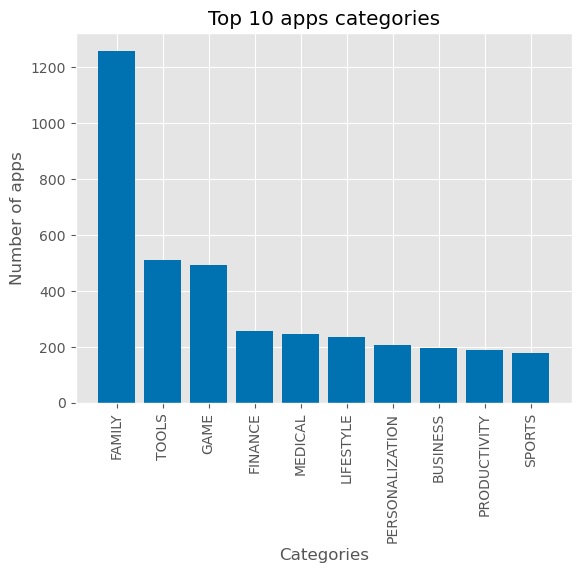

In [129]:
# plotting top 10 categories
plt.style.use('seaborn-colorblind')
fig, ax = plt.subplots()
ax.bar(top10_categories.index, top10_categories['Category'])
ax.set_xticklabels(top10_categories.index, rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Number of apps')

ax.set_title('Top 10 apps categories')
plt.show()

C:\Users\Ashhar\AppData\Local\Temp\ipykernel_6200\3591958875.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bottom10_categories.index, rotation=90)


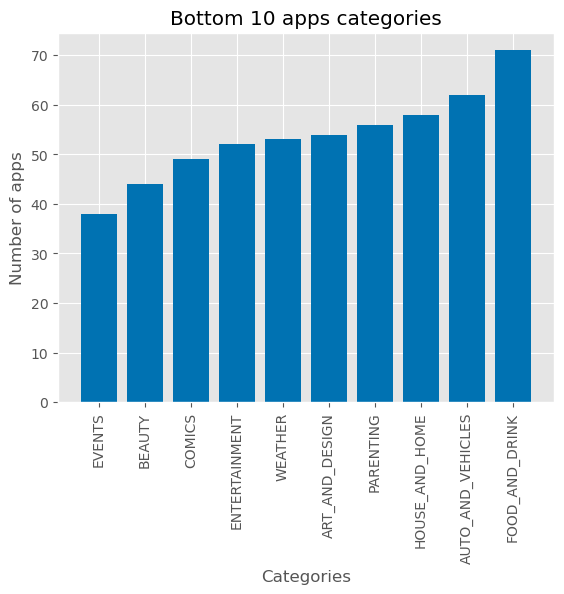

In [130]:
# plotting bottom 10 categories
plt.style.use('seaborn-colorblind')
fig, ax = plt.subplots()
ax.bar(bottom10_categories.index, bottom10_categories['Category'])
ax.set_xticklabels(bottom10_categories.index, rotation=90)
ax.set_xlabel('Categories')
ax.set_ylabel('Number of apps')

ax.set_title('Bottom 10 apps categories')
plt.show()

Share of apps based on categories
Which are the top apps in a particular category based on ratings.
Identifying best performing apps in popular categories

In [131]:
apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,2018-06-14
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,2017-09-20
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,2018-07-03
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28.0,1000000,Free,0.0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up,2017-10-27
11,Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12.0,1000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.0.15,4.0 and up,2018-07-31


Best performing apps in the category Family, Tools , Game, Finance in terms of ratings

In [138]:
apps_df['Category'].value_counts()

FAMILY                 1260
TOOLS                   510
GAME                    493
FINANCE                 258
MEDICAL                 246
LIFESTYLE               236
PERSONALIZATION         208
BUSINESS                195
PRODUCTIVITY            189
SPORTS                  179
HEALTH_AND_FITNESS      172
NEWS_AND_MAGAZINES      168
COMMUNICATION           145
BOOKS_AND_REFERENCE     143
TRAVEL_AND_LOCAL        134
SOCIAL                  131
PHOTOGRAPHY             129
DATING                  109
SHOPPING                100
VIDEO_PLAYERS            97
EDUCATION                91
MAPS_AND_NAVIGATION      87
LIBRARIES_AND_DEMO       73
FOOD_AND_DRINK           71
AUTO_AND_VEHICLES        62
HOUSE_AND_HOME           58
PARENTING                56
ART_AND_DESIGN           54
WEATHER                  53
ENTERTAINMENT            52
COMICS                   49
BEAUTY                   44
EVENTS                   38
Name: Category, dtype: int64

In [140]:
family_cat = apps_df[apps_df['Category'] == 'FAMILY']

In [149]:
family_cat.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
1575,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19.0,1000000,Free,0.0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up,2018-07-23
1578,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46.0,1000000,Free,0.0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up,2018-07-16
1579,Toy Pop Cubes,FAMILY,4.5,5761,21.0,1000000,Free,0.0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up,2018-07-04
1581,Candy Pop Story,FAMILY,4.7,12948,23.0,1000000,Free,0.0,Everyone,Casual;Brain Games,"May 24, 2018",2.0.3165,2.3 and up,2018-05-24
1582,Candy Smash,FAMILY,4.5,11436,15.0,1000000,Free,0.0,Everyone,Casual;Brain Games,"April 17, 2018",2.2.3169,4.0.3 and up,2018-04-17


In [165]:
# top 15 app based on ratings in family category
family_cat.sort_values(by='Rating', ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
4867,Quran Khmer Offline AY,FAMILY,5.0,41,4.0,1000,Free,0.0,Everyone,Education,"December 13, 2017",10.6,4.2 and up,2017-12-13
4542,Accounting Quiz (AQ) Malaysia,FAMILY,5.0,25,NaN,1000,Free,0.0,Everyone,Education,"January 29, 2018",Varies with device,4.0 and up,2018-01-29
9235,Jigsaw Volvo FH 16 Trucks,FAMILY,5.0,5,8.1,1000,Free,0.0,Teen,Puzzle,"December 1, 2016",1,4.0 and up,2016-12-01
4487,AP® Guide,FAMILY,5.0,3,2.1,1000,Free,0.0,Everyone,Education,"July 31, 2017",1.3,4.0.3 and up,2017-07-31
5456,BM SPM Practice,FAMILY,5.0,6,9.2,1000,Free,0.0,Everyone,Education,"January 24, 2018",1,4.1 and up,2018-01-24
6783,CS & IT Interview Questions,FAMILY,5.0,43,3.3,1000,Free,0.0,Everyone,Education,"March 27, 2018",1.1,4.2 and up,2018-03-27
9163,Safe Santa Fe,FAMILY,5.0,2,12.0,1000,Free,0.0,Everyone,Education,"July 4, 2016",1,4.0 and up,2016-07-04
9454,Florida Wildflowers,FAMILY,5.0,5,69.0,1000,Free,0.0,Everyone,Education,"July 10, 2017",1.5,4.1 and up,2017-07-10
5792,Barisal University App-BU Face,FAMILY,5.0,100,10.0,1000,Free,0.0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up,2018-05-06
8370,Master E.K,FAMILY,5.0,90,NaN,1000,Free,0.0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up,2017-08-11


In [142]:
tools_cat = apps_df[apps_df['Category'] == 'TOOLS']

In [167]:
tools_cat.sort_values(by='Rating', ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
5150,ReactNative BG Geolocation,TOOLS,5.0,5,9.1,1000,Free,0.00,Everyone,Tools,"May 25, 2018",2.12.0,4.1 and up,2018-05-25
6456,CL REPL,TOOLS,5.0,47,17.0,1000,Free,0.00,Everyone,Tools,"April 10, 2018",1.0.19,4.1 and up,2018-04-10
6464,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,3.2,5000,Free,0.00,Everyone,Tools,"June 13, 2018",1.1.3,4.3 and up,2018-06-13
8822,EV Calculator,TOOLS,4.9,85,19.0,1000,Free,0.00,Everyone,Tools,"July 5, 2018",1.2,4.1 and up,2018-07-05
9191,FG On-The-Go,TOOLS,4.9,55,25.0,1000,Free,0.00,Everyone,Tools,"June 29, 2018",2.01.0.2,4.1 and up,2018-06-29
3906,ZArchiver Donate,TOOLS,4.8,1721,NaN,10000,Paid,2.50,Everyone,Tools,"February 16, 2018",Varies with device,Varies with device,2018-02-16
6524,cm to inches | centimeters to inches conversion,TOOLS,4.8,52,1.9,5000,Free,0.00,Everyone,Tools,"May 7, 2018",1.3.2,4.0 and up,2018-05-07
3403,K keyboard - Myanmar,TOOLS,4.8,1955,14.0,100000,Free,0.00,Everyone,Tools,"March 17, 2018",1.0.8,4.1 and up,2018-03-17
6649,Calcy IV,TOOLS,4.8,36557,14.0,1000000,Free,0.00,Everyone,Tools,"August 3, 2018",2.51f,5.0 and up,2018-08-03
9391,FK Crvena Zvezda Izzy,TOOLS,4.8,1456,15.0,50000,Free,0.00,Everyone,Tools,"November 14, 2016",1.2,4.4 and up,2016-11-14


In [143]:
game_cat = apps_df[apps_df['Category'] == 'GAME']

In [168]:
game_cat.sort_values(by='Rating', ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
4032,Solitaire: Decked Out Ad Free,GAME,4.9,37302,35.0,500000,Free,0.00,Everyone,Card,"May 8, 2017",1.3.3,4.1 and up,2017-05-08
1490,The Room: Old Sins,GAME,4.9,21119,48.0,100000,Paid,4.99,Everyone,Puzzle,"April 18, 2018",1.0.1,4.4 and up,2018-04-18
5862,BW-Go,GAME,4.8,265,1.3,1000,Paid,3.49,Everyone,Board,"June 18, 2015",4.8.1,2.3 and up,2015-06-18
6316,Sermon on Proverbs CH Spurgeon,GAME,4.8,35,3.1,10000,Free,0.00,Everyone,Trivia,"July 29, 2016",1.0.0,4.0 and up,2016-07-29
4323,Puppy Shooting an AK-47: Platformer Zombie Game,GAME,4.8,21,89.0,1000,Free,0.00,Everyone,Arcade,"March 30, 2018",0.46.91,4.4 and up,2018-03-30
6829,CT-ART 4.0 (Chess Tactics 1200-2400 ELO),GAME,4.8,8191,NaN,100000,Free,0.00,Everyone,Board,"May 22, 2018",1.1.0,4.1 and up,2018-05-22
3490,Drag'n'Boom,GAME,4.8,133180,54.0,1000000,Free,0.00,Everyone 10+,Arcade,"January 12, 2018",1.1.1,4.4 and up,2018-01-12
5296,Bingo Party - Free Bingo Games,GAME,4.7,155694,92.0,1000000,Free,0.00,Teen,Board,"July 13, 2018",2.1.1,4.0.3 and up,2018-07-13
7360,Fancy Pants Adventures,GAME,4.7,55952,61.0,1000000,Free,0.00,Everyone 10+,Arcade,"July 13, 2017",1.0.10,4.1 and up,2017-07-13
5603,BQ-መጽሐፍ ቅዱሳዊ ጥያቄዎች,GAME,4.7,191,7.2,5000,Free,0.00,Everyone,Trivia,"July 31, 2018",4.1.2,4.1 and up,2018-07-31


In [144]:
finance_cat = apps_df[apps_df['Category'] == 'FINANCE']

In [169]:
finance_cat.sort_values(by='Rating', ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
9130,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.3,1000,Free,0.0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up,2018-08-07
8927,EY Forensics,FINANCE,4.9,7,3.4,1000,Free,0.0,Everyone,Finance,"June 17, 2016",1.0.1,4.0.3 and up,2016-06-17
5924,Bitcoin & Cryptocurrency - Bx,FINANCE,4.8,11,3.7,1000,Free,0.0,Everyone,Finance,"November 28, 2017",0.1.6,4.1 and up,2017-11-28
881,"Even - organize your money, get paid early",FINANCE,4.8,12304,21.0,100000,Free,0.0,Everyone,Finance,"August 2, 2018",6.0.16,5.0 and up,2018-08-02
6869,Firefighters First CU,FINANCE,4.8,495,12.0,5000,Free,0.0,Everyone,Finance,"May 1, 2018",5.7.1.0,5.0 and up,2018-05-01
9127,FD Calculator | Term Deposit | Fixed Deposit,FINANCE,4.8,12,2.7,1000,Free,0.0,Everyone,Finance,"June 13, 2018",2.1,5.0 and up,2018-06-13
6081,Citizens Bank - CB Mobile,FINANCE,4.8,6,11.0,1000,Free,0.0,Everyone,Finance,"August 2, 2018",4.19.62,4.4 and up,2018-08-02
7733,dt Pro,FINANCE,4.8,4,4.5,1000,Free,0.0,Everyone,Finance,"May 16, 2017",3.1,2.2 and up,2017-05-16
3618,Q Mobile Banking,FINANCE,4.7,460,12.0,10000,Free,0.0,Everyone,Finance,"June 26, 2018",5.9.1.0,5.0 and up,2018-06-26
9132,"EMI, FD, RD - Bank Calculator",FINANCE,4.7,42,3.5,5000,Free,0.0,Everyone,Finance,"April 2, 2017",2.3,4.1 and up,2017-04-02


Market capitalisation of categories

In [170]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26


In [255]:
s = apps_df['Category'].value_counts(normalize=True).sort_values(ascending=False).head(5)
s

FAMILY     0.213922
TOOLS      0.086587
GAME       0.083701
FINANCE    0.043803
MEDICAL    0.041766
Name: Category, dtype: float64

Plotting this share of market

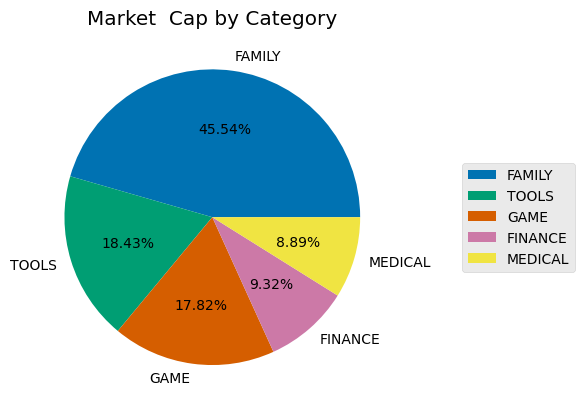

In [263]:
fig, ax = plt.subplots()
ax.pie(s, autopct='%.2f%%', labels=s.index)
ax.set_title('Market  Cap by Category')
ax.legend(s.index, loc = 'center right', bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()


#### Way of creating pie chart
##### Import libraries
import numpy as np
import matplotlib.pyplot as plt


#### Creating dataset
cars = ['AUDI', 'BMW', 'FORD',
		'TESLA', 'JAGUAR', 'MERCEDES']

data = [23, 17, 35, 29, 12, 41]


#### Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

#### Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

##### Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

#### Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} g)".format(pct, absolute)

#### Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = cars,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="magenta"))

#### Adding legend
ax.legend(wedges, cars,
		title ="Cars",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

#### show plot
plt.show()


Average ratings in categories 

In [183]:
cat_ratings = apps_df.groupby('Category')[['Rating']].mean().reset_index()
cat_ratings

,Category,Rating
0,ART_AND_DESIGN,4.332692
1,AUTO_AND_VEHICLES,4.188710
2,BEAUTY,4.294737
3,BOOKS_AND_REFERENCE,4.306923
4,BUSINESS,4.017222
5,COMICS,4.214583
6,COMMUNICATION,3.995455
7,DATING,3.933981
8,EDUCATION,4.342222
9,ENTERTAINMENT,4.140385


In [186]:
cat_ratings = cat_ratings.set_index('Category')

In [191]:
cat_ratings = cat_ratings.sort_values(by='Rating', ascending=False)

In [192]:
cat_ratings

,Rating
Category,
EVENTS,4.381250
EDUCATION,4.342222
PARENTING,4.334783
ART_AND_DESIGN,4.332692
PERSONALIZATION,4.310363
BOOKS_AND_REFERENCE,4.306923
BEAUTY,4.294737
WEATHER,4.238000
COMICS,4.214583


In [227]:
cat_ratings['Rating'] = cat_ratings['Rating'].apply(lambda x: round(x, 2))

In [231]:
cat_ratings

,Rating
Category,
EVENTS,4.38
EDUCATION,4.34
PARENTING,4.33
ART_AND_DESIGN,4.33
PERSONALIZATION,4.31
BOOKS_AND_REFERENCE,4.31
BEAUTY,4.29
WEATHER,4.24
COMICS,4.21


C:\Users\Ashhar\AppData\Local\Temp\ipykernel_6200\1415411569.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cat_ratings.index, rotation=90, size=14)


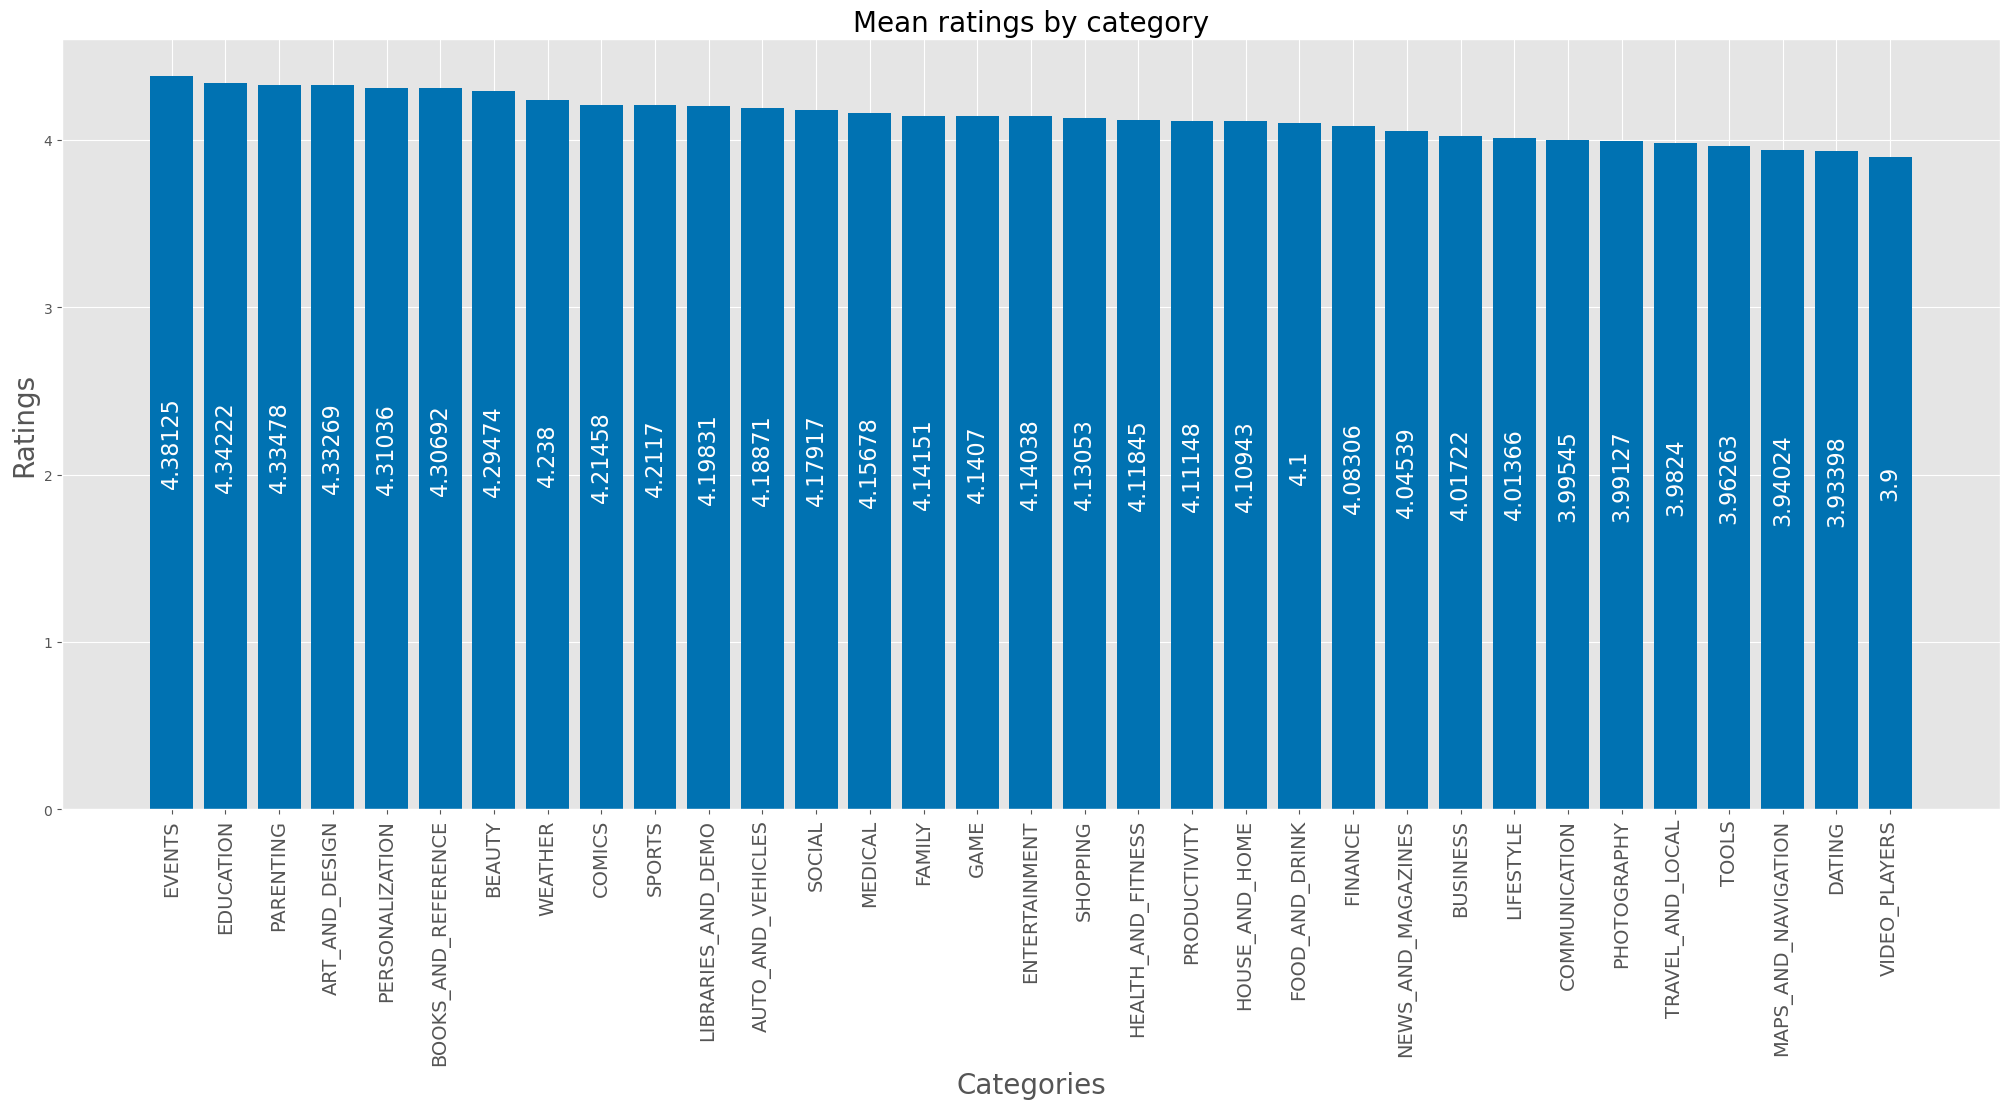

<Figure size 4000x2000 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [266]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = plt.figure(figsize=(40,20))
plt.figure(figsize=(10, 6))
ax.bar(cat_ratings.index, cat_ratings['Rating'])
ax.set_xticklabels(cat_ratings.index, rotation=90, size=14)
ax.set_xlabel('Categories', size=20)
ax.set_ylabel('Ratings', size=20)
ax.bar_label(splot.containers[0],size=16,label_type='center', rotation=90, color='white')
# ax.legend()
ax.set_title('Mean ratings by category', size=20)
plt.show()





To check whether rating is a function of size or not

In [269]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26


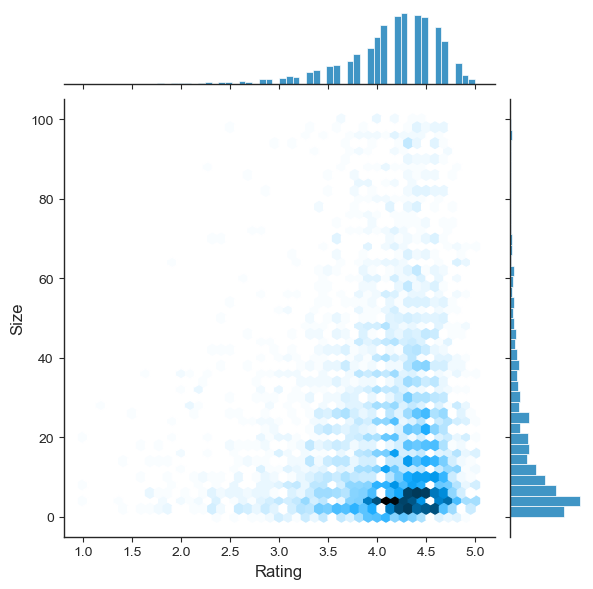

In [376]:
import seaborn as sns
sns.jointplot(x = "Rating", y = "Size",
              kind = "hex", data = apps_df)
# show the plot
plt.show()

Thus, it can inferred that most of the apps that the rating is around 4.0-4.5 and the most ideal size of an app must be within 30mb. 

Analysing category and prices of the apps

To check whether rating is the function of price 

we will filter out all the apps whose price is < 200

In [272]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26


In [280]:
apps_df['Price'].value_counts()

0.00      5417
2.99        96
0.99        68
4.99        58
1.99        50
          ... 
1.59         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 63, dtype: int64

In [317]:
# To knwo the categories in which there are more number of priced apps
# pricedapps = apps_df[(apps_df['Price'] > 0.0) | (apps_df['Price'] <= 200.0)]
pricedappsBelow200  = apps_df.loc[(apps_df['Price'] > 0.0) & (apps_df['Price'] <= 200.0)]

In [318]:
pricedappsBelow200['Price'].value_counts()

2.99     96
0.99     68
4.99     58
1.99     50
3.99     42
2.49     17
9.99     12
5.99     12
1.49     12
6.99      9
4.49      7
14.99     7
7.99      6
3.49      4
11.99     3
19.99     3
29.99     3
1.00      2
8.99      2
8.49      2
1.70      2
16.99     2
10.99     2
24.99     2
10.00     2
5.49      2
7.49      2
1.50      1
3.28      1
3.90      1
15.46     1
13.99     1
4.29      1
12.99     1
4.60      1
2.59      1
2.95      1
2.90      1
1.97      1
2.56      1
19.40     1
18.99     1
3.08      1
9.00      1
37.99     1
1.29      1
1.59      1
2.50      1
1.61      1
4.77      1
4.84      1
17.99     1
79.99     1
3.95      1
74.99     1
33.99     1
1.20      1
Name: Price, dtype: int64

In [319]:
pricedappsBelow200

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,2018-03-25
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,2017-04-11
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,2018-07-05
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,2018-06-19
407,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,2017-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,Solitaire+,GAME,4.6,11235,NaN,100000,Paid,2.99,Everyone,Card,"July 30, 2018",Varies with device,Varies with device,2018-07-30
9505,Fruit Ninja Classic,GAME,4.3,85468,36.0,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,2018-06-08
9579,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,2018-08-08
9600,Trine 2: Complete Story,GAME,3.8,252,11.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,2015-02-27


In [320]:
pricedappsBelow200['Category'].value_counts()
# //Almost in every category the priced apps are there

FAMILY                 118
GAME                    63
MEDICAL                 54
TOOLS                   46
PERSONALIZATION         40
SPORTS                  18
PRODUCTIVITY            14
COMMUNICATION           14
HEALTH_AND_FITNESS      12
PHOTOGRAPHY             12
LIFESTYLE               11
TRAVEL_AND_LOCAL         9
WEATHER                  6
FINANCE                  5
BOOKS_AND_REFERENCE      5
BUSINESS                 5
EDUCATION                4
VIDEO_PLAYERS            4
MAPS_AND_NAVIGATION      4
ART_AND_DESIGN           3
FOOD_AND_DRINK           2
ENTERTAINMENT            2
SOCIAL                   2
DATING                   2
AUTO_AND_VEHICLES        1
NEWS_AND_MAGAZINES       1
PARENTING                1
SHOPPING                 1
Name: Category, dtype: int64

Text(0.5, 1.0, 'Pricing below 200 across different categories')

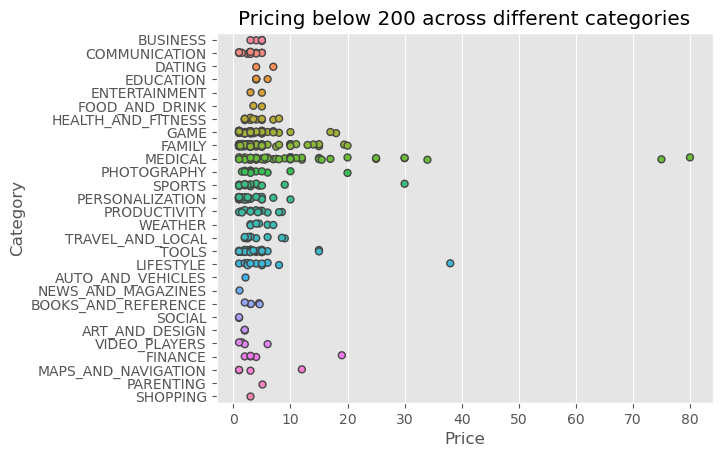

In [321]:
# plotting prices in each category
fig, ax = plt.subplots()
ax = sns.stripplot(x='Price', y='Category', data=pricedappsBelow200, jitter=True, linewidth=1)
ax.set_title('Pricing below 200 across different categories')

A large number of apps in the medical category are paid apps whose most prices are within 35 rupees and as expensive as 75 and 80 rupees, followed by Family and Games category. 


In [322]:
appsPriceAbove200 = apps_df.loc[apps_df['Price'] > 200]

In [323]:
appsPriceAbove200

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
3465,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,2018-03-11
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,2018-05-03
4396,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up,2018-01-12
4398,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up,2018-05-19
4399,I am rich VIP,LIFESTYLE,3.8,411,2.6,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,2018-07-21
4400,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,2017-11-12
4401,I am extremely Rich,LIFESTYLE,2.9,41,2.9,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up,2018-07-01
4402,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up,2017-12-11
4403,I am rich(premium),FINANCE,3.5,472,1.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,2017-05-01
4406,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,2017-05-30


In [324]:
appsPriceAbove200['Price'].value_counts()

399.99    10
400.00     1
299.99     1
379.99     1
389.99     1
Name: Price, dtype: int64

Text(0.5, 1.0, 'Pricing above 200 across different categories')

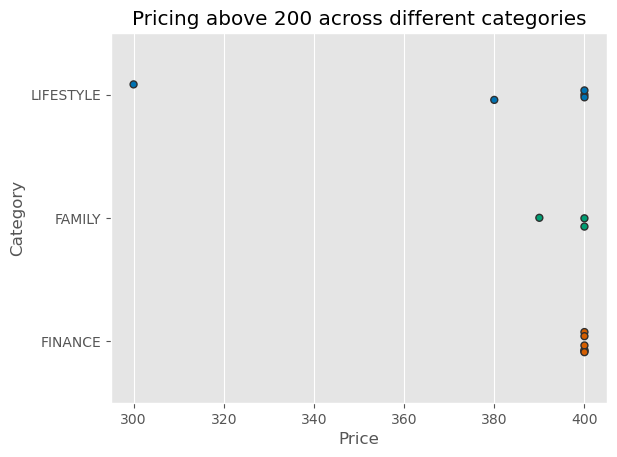

In [325]:
# plotting prices in each category
fig, ax = plt.subplots()
ax = sns.stripplot(x='Price', y='Category', data=appsPriceAbove200, jitter=True, linewidth=1)
ax.set_title('Pricing above 200 across different categories')

There are only 3 categories namely family, finance and lifestyle that cosist of apps having max price of 400 rupees and most of them are in the finance category. 

Relationship between  app price and ratings (apps whose prices are below 200)
As most of the priced apps are below 200, so we will check for those apps whose prices are < 200

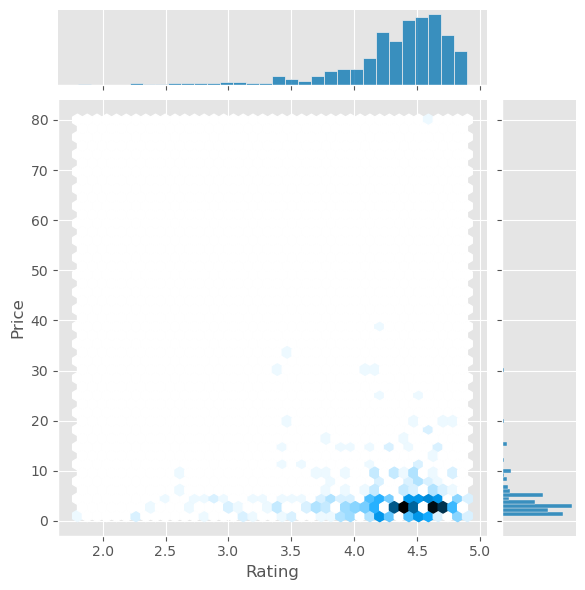

In [327]:
sns.jointplot(x = 'Rating', y='Price', kind='hex', data=pricedappsBelow200)
# show the plot
plt.show()

In [ ]:
The safe and the most liked range for pricing the app is below 10 rupees. 

Popularity among paid apps and free apps

In [328]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26


We will plot box plot both for paid and free apps based on the number of installs

In [334]:
freeApps = apps_df.loc[apps_df['Type'] == 'Free']

In [335]:
paidApps = apps_df.loc[apps_df['Type'] == 'Paid']

In [336]:
freeApps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9650,FR Tides,WEATHER,3.8,1195,0.6,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6,2.1 and up,2014-02-16
9651,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,2014-03-23
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,2017-07-25
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up,2017-01-20


In [337]:
paidApps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,2018-03-25
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,2017-04-11
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,2018-07-05
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,2018-06-19
407,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,2017-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,Solitaire+,GAME,4.6,11235,NaN,100000,Paid,2.99,Everyone,Card,"July 30, 2018",Varies with device,Varies with device,2018-07-30
9505,Fruit Ninja Classic,GAME,4.3,85468,36.0,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,2018-06-08
9579,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,2018-08-08
9600,Trine 2: Complete Story,GAME,3.8,252,11.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,2015-02-27


Relationship between size and installs of paid apps

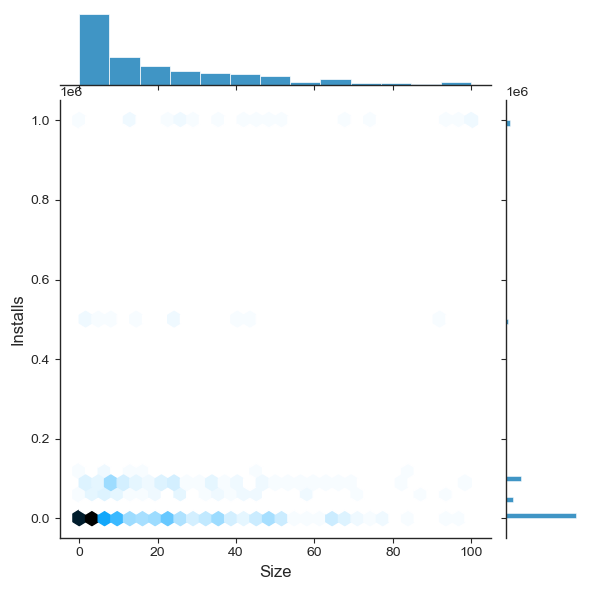

In [371]:
sns.jointplot(x = 'Size', y='Installs', kind='hex', data=paidApps)
# show the plot
plt.show()

##### In case of paid apps:
###### In paid apps approximately 50000 downloads are there for the app of size <50mb.
###### Also, there are approx 1lac downloads of the app, but they must be with 25mb.
###### To increase the number of installs, you have to bring brought down the size of the app within 30mb (approx).


Relationship between size and installs of freeapps

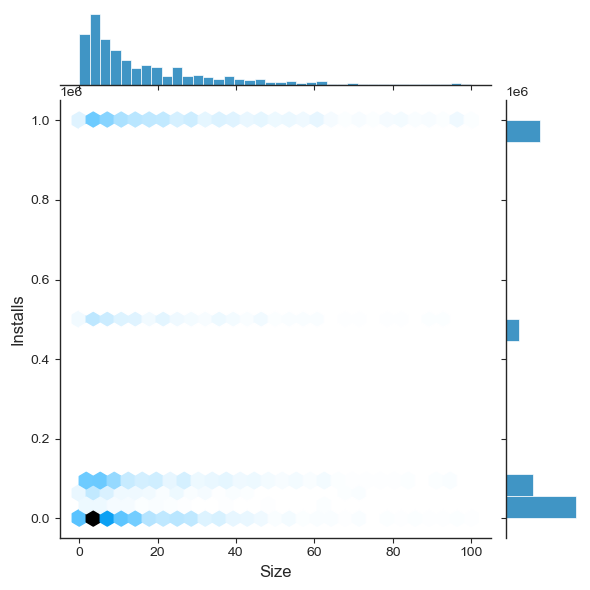

In [373]:
sns.jointplot(x='Size', y='Installs', kind='hex', data=freeApps)
plt.show()

##### In case of free apps:
###### 100000 downloads can be achived if the size of the app falls below 40-45mb.
###### 500000+ downloads can be achieved if the size is around 20mb(approx).
###### 1 million downloads can be acheived, even if the size falls near to 50mb.